<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-ZTM/blob/main/TF_ZTM_01_Neural_Network_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias `tf` (short for TensorFlow).

In [8]:

import tensorflow as tf
print(tf.__version__)

2.11.0


##Creating data to view and Fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Create Features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

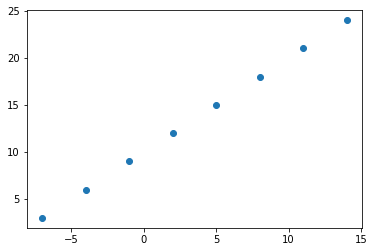

In [3]:
plt.scatter(X,y);

In [4]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

###Input shapes


In [9]:
#Create tensors for our housing price prediction problem
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([939700])
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [10]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [14]:
#Turn our Numpy array into tenors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

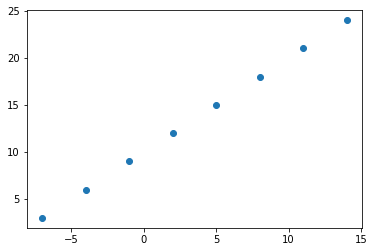

In [16]:
plt.scatter(X,y)

## Steps in Modelling with Tensorflow

1. **Creating a model** - define the nput layer, output layer, as well as the hidden layers of a deep learning model
2. **Compiling a model**- define the loss function (in other words, the function which tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting the model-** letting the model try to find patterns between X & y (features and labels)

Get the data ready->build otr pick a pretraiuned model(to suit your problem) -> Fit the model to the data and make a prediction -> Evaluate the model -> Improve through experimentation -> save and reload your trained model.


In [ ]:
#another way of creating the layers.  
model=tf.keras.Sequential
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

In [28]:
#Creating the model using sequential APIs
tf.random.set_seed(42)

#1. Create a model using the sequentiual API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fit the model
#model.fit(X,y,epochs=5)
#for tf version 2.7+, we need to use the below for fitting the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5);

Epoch 1/5
1/1 [==============================] - 0s 300ms/step - loss: 9.2386 - mae: 9.2386
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 9.1061 - mae: 9.1061
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 8.9736 - mae: 8.9736
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 8.8411 - mae: 8.8411
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 8.7086 - mae: 8.7086


In [22]:
#Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [24]:
#Try and make a predictio using a model
y_pred=model.predict([17.0])

1/1 [==============================] - 0s 37ms/step


In [25]:
y_pred+16

array([[6.4850025]], dtype=float32)

### Improving our model
We can improve our model by altering the steps we used to create our model.

1. Creating a model -  here, we might add more layers, increase the number of hidden units within each of the hidden layers, change the activation function of the layer.

2. Compiling the model - here we might change the optimization function or perhaps the learning rate of the optimization function

3. Fitting the model - here we might fir a model for more epochs(leave it training for longer) or on more data (give the model more examples to learn from)

In [35]:
#Create the bigger model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['mae'])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)
#model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.1452 - mae: 13.1452
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1087 - mae: 13.1087
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0722 - mae: 13.0722
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0356 - mae: 13.0356
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9993 - mae: 12.9993
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9641 - mae: 12.9641
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9289 - mae: 12.9289
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8941 - mae: 12.8941
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8599 - mae: 12.8599
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8260 - mae: 12.8260
Epoch 11/100
1/1 [==============================] - 0s 11m

In [36]:
model.predict([17.0])

1/1 [==============================] - 0s 82ms/step


array([[12.385229]], dtype=float32)

### Another attempt

In [38]:
#Create the bigger model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)
#model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 788ms/step - loss: 13.5280 - mae: 13.5280
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.2073 - mae: 13.2073
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8921 - mae: 12.8921
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.5909 - mae: 12.5909
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3046 - mae: 12.3046
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0151 - mae: 12.0151
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7079 - mae: 11.7079
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3862 - mae: 11.3862
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0567 - mae: 11.0567
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7674 - mae: 10.7674
Epoch 11/100
1/1 [==============================] - 0

In [39]:
model.predict([17.0])

1/1 [==============================] - 0s 124ms/step


array([[31.05357]], dtype=float32)

### Another attempt to improve the model

In [42]:
#Create the bigger model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['mae'])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=300)
#model.fit(X,y,epochs=100)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 12.5636 - mae: 12.5636
Epoch 2/300
1/1 [==============================] - 0s 23ms/step - loss: 12.5263 - mae: 12.5263
Epoch 3/300
1/1 [==============================] - 0s 24ms/step - loss: 12.4890 - mae: 12.4890
Epoch 4/300
1/1 [==============================] - 0s 22ms/step - loss: 12.4520 - mae: 12.4520
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 12.4149 - mae: 12.4149
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 12.3785 - mae: 12.3785
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 12.3422 - mae: 12.3422
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 12.3056 - mae: 12.3056
Epoch 9/300
1/1 [==============================] - 0s 20ms/step - loss: 12.2688 - mae: 12.2688
Epoch 10/300
1/1 [==============================] - 0s 8ms/step - loss: 12.2318 - mae: 12.2318
Epoch 11/300
1/1 [==============================] - 

In [43]:
model.predict([17.0])

1/1 [==============================] - 0s 118ms/step


array([[32.05275]], dtype=float32)

## Evaluating our Model

